In [95]:
# cau 1
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [96]:
# cau 2
df = pd.read_csv('heart.csv')
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [97]:
# cau 3 a
df.index

RangeIndex(start=0, stop=303, step=1)

In [98]:
# cau 3 b
columns_eda = df.columns[:-1]
columns_eda

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

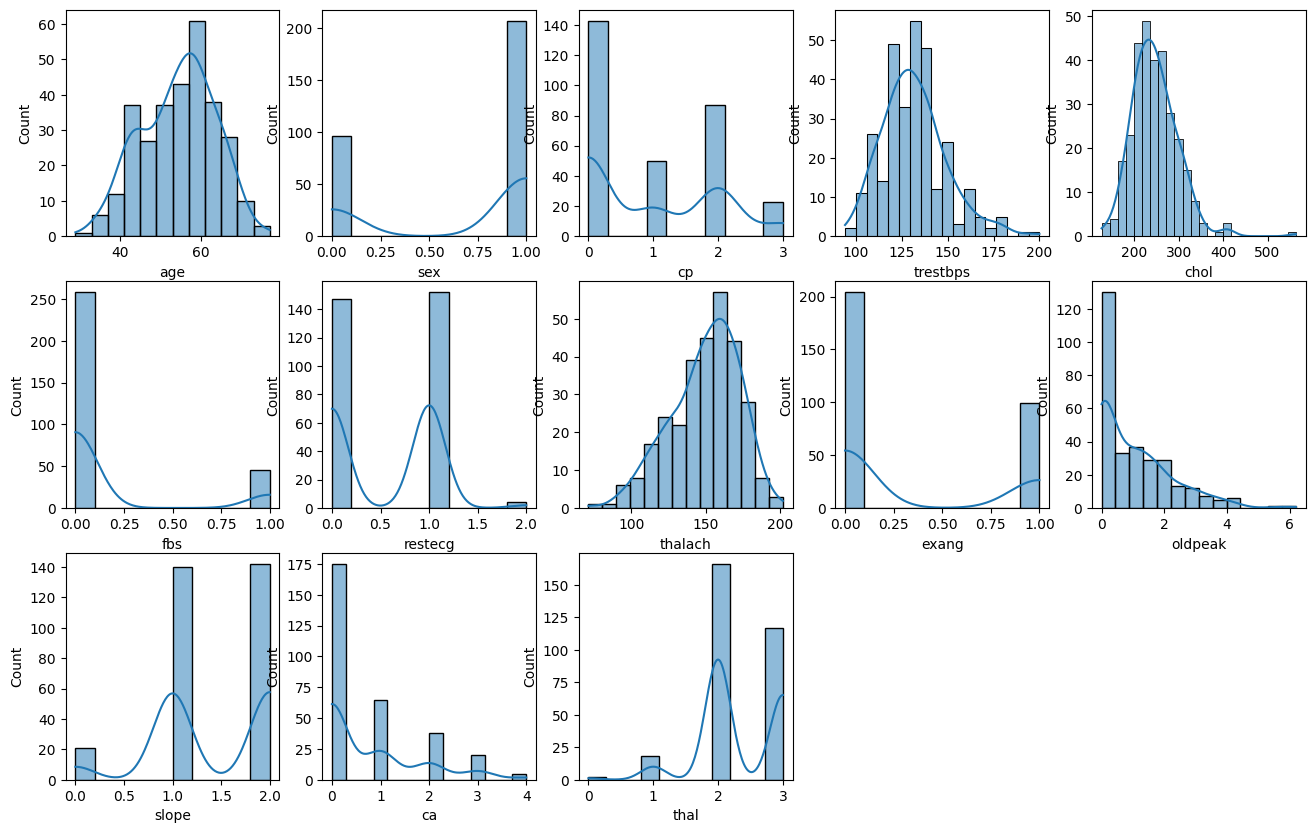

In [99]:
# cau 3 c
fig = plt.figure(figsize=(16,10))

for i in range(len(columns_eda)):
    colname = columns_eda[i]
    sub = fig.add_subplot(3,5,i+1)
    sns.histplot(data=df, x=colname, kde=True)

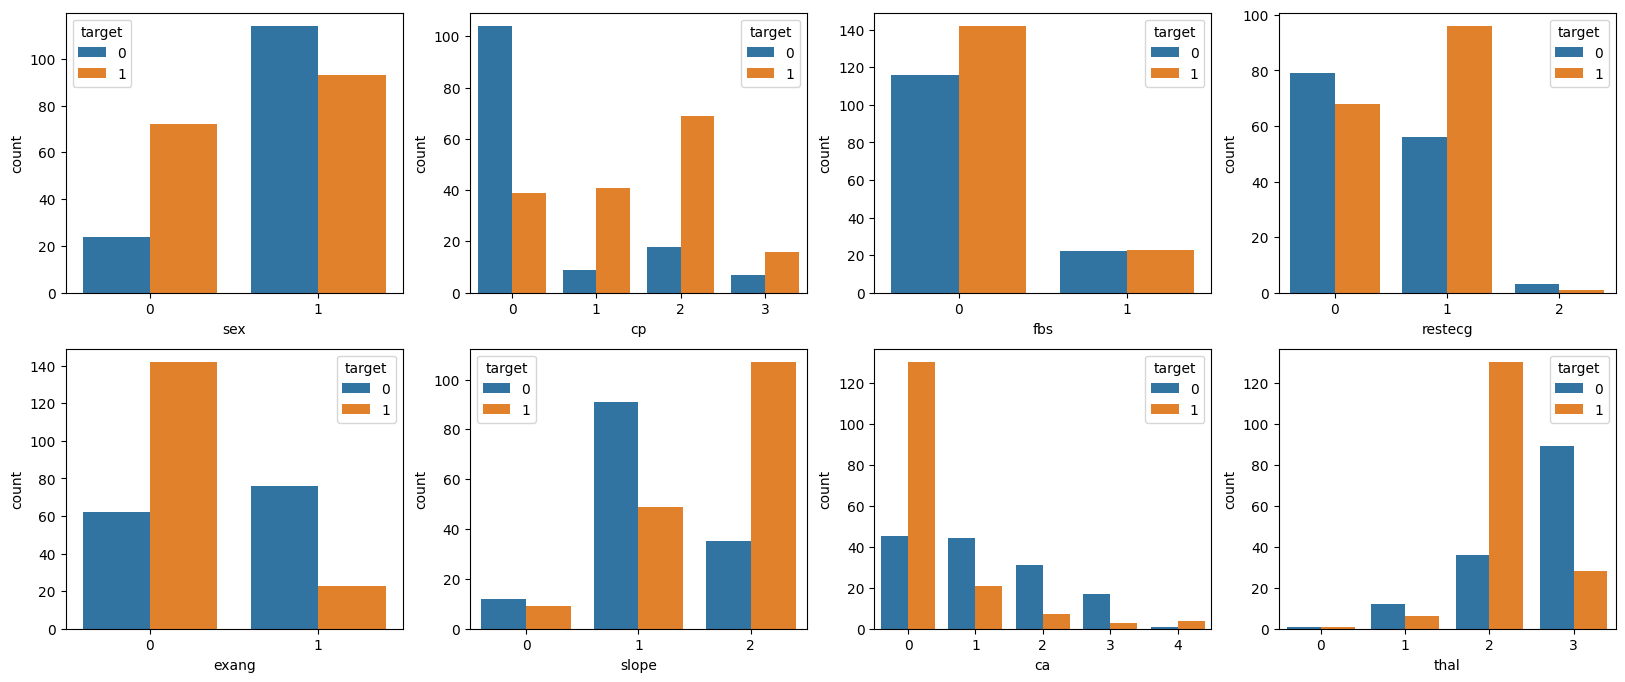

In [100]:
# cau 3 d
categories_list = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
fig = plt.figure(figsize=(20,8))

for i in range(len(categories_list)):
    colname = categories_list[i]
    sub = fig.add_subplot(2,4,i+1)
    sns.countplot(data=df, x=colname, hue="target")

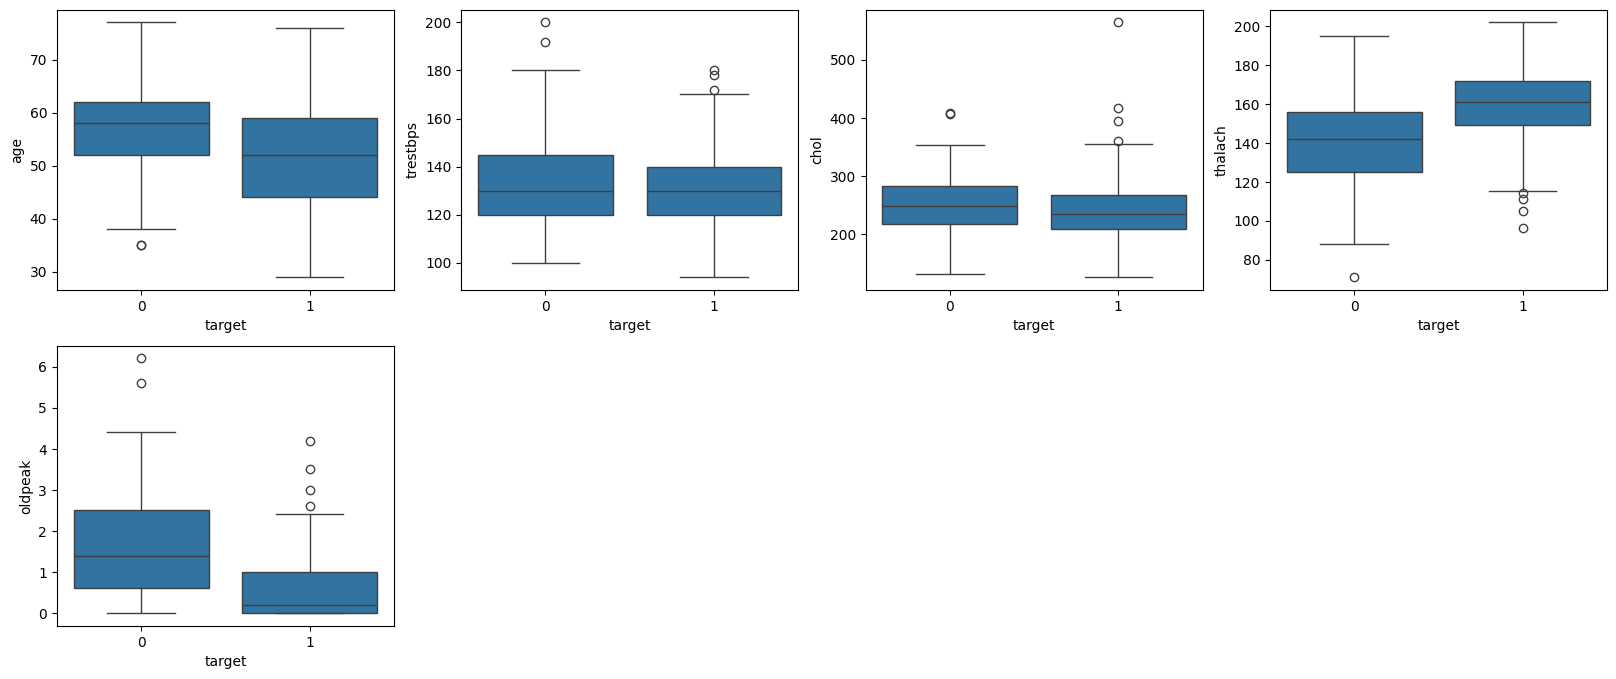

In [101]:
# cau 3 e
numeric_list = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
fig = plt.figure(figsize=(20,8))

for i in range(len(numeric_list)):
    colname = numeric_list[i]
    sub = fig.add_subplot(2,4,i+1)
    sns.boxplot(data=df,y=colname, x="target")

In [102]:
# cau 4 a
X = df.iloc[:, :-1].values
y = df[['target']].values
X = X.astype(float)
y = y.astype(float)

X

array([[63.,  1.,  3., ...,  0.,  0.,  1.],
       [37.,  1.,  2., ...,  0.,  0.,  2.],
       [41.,  0.,  1., ...,  2.,  0.,  2.],
       ...,
       [68.,  1.,  0., ...,  1.,  2.,  3.],
       [57.,  1.,  0., ...,  1.,  1.,  3.],
       [57.,  0.,  1., ...,  1.,  1.,  2.]])

In [103]:
# cau 4 b
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, X_index_train, X_index_test = train_test_split(X, y, df.index, test_size=0.2, random_state=42)

In [104]:
# cau 4 c
print(f'index X_train {X_index_train}')
print(f'index X_test {X_index_test}')

index X_train Index([132, 202, 196,  75, 176,  59,  93,   6, 177,  30,
       ...
        87, 214, 121, 302,  20, 188,  71, 106, 270, 102],
      dtype='int64', length=242)
index X_test Index([179, 228, 111, 246,  60,   9, 119, 223, 268,  33,   5, 101,  45, 175,
       118,  46, 125, 192, 285, 279, 152, 269, 272,  25, 146, 283, 254,  73,
       231, 109, 139, 284, 198,  42,  17, 168,  76,  90,  24,  57,  92,  77,
       137, 116,   7, 251, 281,  78, 292, 232, 219, 255,  63,  82, 236, 204,
       249, 104, 300, 193, 184],
      dtype='int64')


In [105]:
# cau 4 d
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=8, algorithm='ball_tree')

knn.fit(X_train, y_train)

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(algorithm='ball_tree', n_neighbors=8)

In [106]:
# cau 4 e
knn.score(X_test, y_test)

0.6885245901639344

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: 

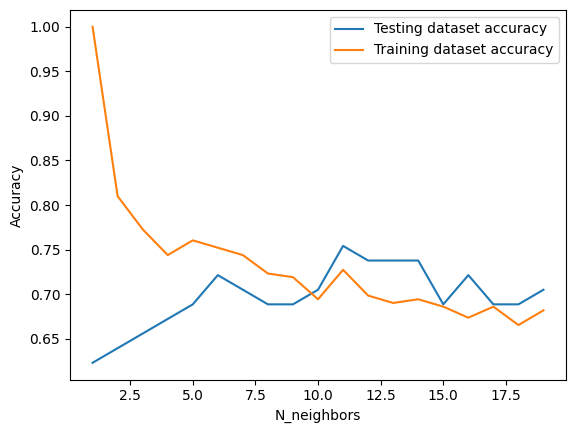

In [107]:
# cau 4 f
import numpy as np

neighbors = np.arange(1, 20)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)


plt.plot(neighbors, test_accuracy, label="Testing dataset accuracy")
plt.plot(neighbors, train_accuracy, label="Training dataset accuracy")

plt.legend()
plt.xlabel('N_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [108]:
# cau 5
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=11)

In [109]:
# cau 6
distances, indices = knn.kneighbors(X_test)

print(f'distance: {distances}')
print(f'indices: {indices}')

distance: [[ 6.63626401 17.93906352 18.22882333 23.23122898 24.27673784 27.23894271
  28.29416901 28.8159678  31.74649587 32.21241996 32.83230117]
 [20.96759404 21.51650529 26.15415837 27.35616932 27.89336839 28.93095228
  31.43580761 32.57299495 34.21461676 35.98555266 36.39725264]
 [46.55276576 46.92589903 53.2169146  54.00962877 54.00962877 54.46503466
  61.48788499 61.61980201 61.91413409 62.66450351 62.98761783]
 [15.49870962 18.20466973 18.77471704 56.31349749 58.30686066 58.89388763
  68.9890571  70.70509175 73.89594035 75.21043811 78.1422421 ]
 [14.45821566 18.65368596 23.08332732 23.13201245 23.40939982 25.0998008
  25.74878638 26.25718949 27.05845524 28.40492915 28.7923601 ]
 [18.4        21.65733132 23.94911272 23.94911272 27.62173058 29.97599039
  30.36511156 32.17530109 36.38076415 36.66824239 36.70912693]
 [ 7.07389567 12.38709005 14.         14.83239697 14.96529318 15.82276841
  16.53027525 18.24719156 18.55397532 19.13112647 19.32459573]
 [32.32274741 46.79059735 47.968

In [110]:
# cau 7
# Cho biết sample input đầu tiên trong tập test sẽ lần lượt gần K (hàng xóm) dòng nào trong 
# tập train tính theo index và khoảng cách tương đương theo độ đo Euclidean là bao nhiêu?

K = 11

def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2)**2))

distances = []
for i, train_point in enumerate(X_train):
    distance = euclidean_distance(X_train[0], train_point)
    distances.append((i, distance))

# Sắp xếp các khoảng cách
sorted_distances = sorted(distances, key=lambda x: x[1])

# Lấy K hàng xóm gần nhất
nearest_neighbors = sorted_distances[:K]
for neighbor in nearest_neighbors:
    print(f"Index: {neighbor[0]}, Distance: {neighbor[1]}")


Index: 0, Distance: 0.0
Index: 73, Distance: 10.457533169921097
Index: 209, Distance: 12.649110640673518
Index: 53, Distance: 13.30413469565007
Index: 71, Distance: 17.146428199482248
Index: 171, Distance: 17.52141546793523
Index: 6, Distance: 18.734993995195193
Index: 5, Distance: 19.131126469708992
Index: 75, Distance: 19.652989594461197
Index: 122, Distance: 21.317598363793234
Index: 131, Distance: 22.50799857828323


In [111]:
# cau 8
# Cho biết với một sample input tương ứng ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 
# 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'] = [47,0,0,150,250,0,1,140,1,0.5,1,0,2] thì sẽ
# ần K hàng xóm nào trong tập huấn luyện, với tương ứng lần lượt khoảng cách là bao nhiêu
# và cho biết giá trị Age của hàng xóm gần nhất.

sample_input = [47,0,0,150,250,0,1,140,1,0.5,1,0,2]

def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2)**2))

distances = []
for i, train_point in enumerate(X_train):
    distance = euclidean_distance(np.array(sample_input), train_point)
    distances.append((i, distance))

# Sort by distance
sorted_distances = sorted(distances, key=lambda x: x[1])

# Get K nearest neighbors
nearest_neighbors = sorted_distances[:K]

# Print the nearest neighbors and their distances
for neighbor in nearest_neighbors:
    print(f"Index: {neighbor[0]}, Distance: {neighbor[1]}")

# Get the age of the nearest neighbor
nearest_neighbor_index = nearest_neighbors[0][0]
nearest_neighbor_age = X_train[nearest_neighbor_index][0]
print(f"Age of the nearest neighbor: {nearest_neighbor_age}")

Index: 168, Distance: 16.132265804901678
Index: 2, Distance: 20.65453945262397
Index: 180, Distance: 21.383404780343096
Index: 11, Distance: 21.396495040076072
Index: 94, Distance: 22.1153792642134
Index: 62, Distance: 23.021946051539604
Index: 172, Distance: 23.095670589961227
Index: 213, Distance: 23.2379000772445
Index: 67, Distance: 23.89748940788551
Index: 66, Distance: 24.47059459841546
Index: 189, Distance: 24.58149710656371
Age of the nearest neighbor: 61.0


In [112]:
# cau 9. 
# Xem danh sách các giá trị của lớp đánh nhãn của biến output (target) nhằm xác định bệnh 
# nhân có bệnh hay không
knn.classes_

array([0., 1.])

In [113]:
# cau 10. Xem danh sách xác suất tiền dự báo của các mẫu dữ liệu tập test theo các nhãn đầu ra
y_test_prob = knn.predict_proba(X_test)
y_test_prob

array([[1.        , 0.        ],
       [0.45454545, 0.54545455],
       [0.45454545, 0.54545455],
       [0.45454545, 0.54545455],
       [0.63636364, 0.36363636],
       [0.18181818, 0.81818182],
       [0.36363636, 0.63636364],
       [0.63636364, 0.36363636],
       [0.72727273, 0.27272727],
       [0.27272727, 0.72727273],
       [0.63636364, 0.36363636],
       [0.45454545, 0.54545455],
       [0.18181818, 0.81818182],
       [0.54545455, 0.45454545],
       [0.18181818, 0.81818182],
       [0.18181818, 0.81818182],
       [0.18181818, 0.81818182],
       [0.54545455, 0.45454545],
       [0.72727273, 0.27272727],
       [0.54545455, 0.45454545],
       [0.45454545, 0.54545455],
       [0.81818182, 0.18181818],
       [0.72727273, 0.27272727],
       [0.36363636, 0.63636364],
       [0.45454545, 0.54545455],
       [0.27272727, 0.72727273],
       [0.72727273, 0.27272727],
       [0.        , 1.        ],
       [0.63636364, 0.36363636],
       [0.36363636, 0.63636364],
       [0.

In [114]:
# cau 11. Cho biết mẫu input thứ hai trong tập test khi qua mô hình dự báo sẽ cho xác xuất dự báo 
# nhãn nào cao hơn và giá trị là bao nhiêu, còn nhãn thấp là nhãn nào có xác suất bao nhiêu

sample_input2_prob = knn.predict_proba(np.array(X_test[1]).reshape(1, -1))[0]

max_index = np.argmax(sample_input2_prob)
min_index = np.argmin(sample_input2_prob)

max_value = sample_input2_prob[max_index]
min_value = sample_input2_prob[min_index]

print(f'nhan cao hon la {knn.classes_[max_index]} va co gia tri {max_value}')
print(f'nhan thap hon la {knn.classes_[min_index]} va co gia tri {min_value}')

nhan cao hon la 1.0 va co gia tri 0.5454545454545454
nhan thap hon la 0.0 va co gia tri 0.45454545454545453


In [115]:
# cau 12. Liệt kê danh sách các nhãn dự báo thông qua mô hình của các mẫu dữ liệu input trong tập 
# test. Hãy cho biết kết quả dự báo của mẫu input thứ 5 trong tập test sẽ được dự báo là bao 
# nhiêu?

y_test_predicted = knn.predict(X_test)
y_test_predicted[4]

0.0

In [116]:
# 13. Hãy cho biết nếu điều chỉnh ngưỡng xác suất (threshold) đưa ra quyết định là 0.65 thì kết 
# quả dự báo của mẫu input số hai và mẫu số năm và mẫu số sáu là bao nhiêu

sample_y_test_predicted_065 = (knn.predict_proba(X_test)[:,1] >= 0.65).astype(float)

print(f'mau so 2: {sample_y_test_predicted_065[1]}')
print(f'mau so 5: {sample_y_test_predicted_065[4]}')
print(f'mau so 6: {sample_y_test_predicted_065[5]}')

mau so 2: 0.0
mau so 5: 0.0
mau so 6: 1.0


In [117]:
# cau 14
from sklearn.metrics import confusion_matrix
cfmx = confusion_matrix(y_test, y_test_predicted)
cfmx


array([[20,  9],
       [ 6, 26]], dtype=int64)

In [118]:
# cau 15
tp, fp, tn, fn = cfmx.ravel()

print(f'tp: {tp}')
print(f'Gia tri quan trong nhat la fp: {fp}')
print(f'tn: {tn}')
print(f'fn: {fn}')

tp: 20
Gia tri quan trong nhat la fp: 9
tn: 6
fn: 26


In [119]:
# 16. Hãy đánh giá mô hình thông qua các giá trị Precision, Recall và F1 tổng quát. Trong bài 
# toán dự báo này thì đại lượng nào quan trọng

from sklearn.metrics import classification_report
target_names = ['Không bệnh', 'Có bệnh']
print(classification_report(y_test, y_test_predicted, target_names=target_names))

# trong bài toán này thì giá trị precision là quan trọng nhất vì cần phải giảm fpr để tránh dự 
# đoán nhầm lẫn người có bệnh thành người không bệnh

              precision    recall  f1-score   support

  Không bệnh       0.77      0.69      0.73        29
     Có bệnh       0.74      0.81      0.78        32

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



In [120]:
# cau 17 Hãy in ra bảng báo cáo các đại lượng đánh giá theo từng nhóm giá trị nhãn đầu ra
print(classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

         0.0       0.77      0.69      0.73        29
         1.0       0.74      0.81      0.78        32

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



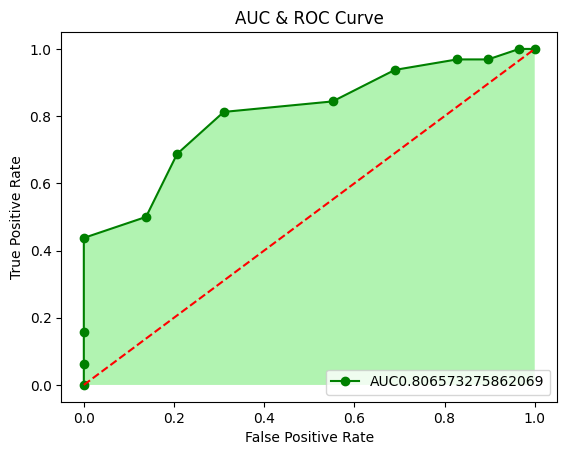

In [121]:
# cau 18 Đánh giá mô hình thông qua đồ thị AUC & ROC
from sklearn import metrics

y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr, tpr, 'go-', label='AUC'+str(auc))
plt.plot([0,1],[0,1],'r--')
plt.title("AUC & ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.fill_between(fpr, tpr, facecolor='lightgreen', alpha=0.7)
plt.show()

In [122]:
# cau 19. Với ngưỡng xác xuất phân lớp là 0.65. Đưa ra kết luận khi thiết lập threshold 
# tăng hoặc threshold giảm sẽ tác động như thế nào đến kết quả đánh giá mô hình.

# kết luận: threshold giảm sẽ làm giảm accuracy của mô hình, giảm fp và fn, tăng tp và tn

# Hãy in ra màn hình accuracy
from sklearn.metrics import accuracy_score

y_test_predicted_065 = (knn.predict_proba(X_test)[:,1] >= 0.65).astype(float)

print(f'accuracy score: {accuracy_score(y_test,y_test_predicted_065)}')

accuracy score: 0.6721311475409836


In [123]:
# confusion matrix
cfmx = confusion_matrix(y_test, y_test_predicted_065)
cfmx

array([[25,  4],
       [16, 16]], dtype=int64)

In [124]:
# [tn, fp, fn, tp], [TPR, FNR, FPR, TNR]
tp, fp, tn, fn = cfmx.ravel()
print(f'tp: {tp}')
print(f'fp: {fp}')
print(f'tn: {tn}')
print(f'fn: {fn}')

print(f'tpr: {tp / (tp +fn)}')
print(f'fnr: {fn / (tp +fn)}')
print(f'fpr: {fp / (fp +tn)}')
print(f'tnr: {tn / (fp +tn)}')

tp: 25
fp: 4
tn: 16
fn: 16
tpr: 0.6097560975609756
fnr: 0.3902439024390244
fpr: 0.2
tnr: 0.8


In [125]:
# [precision, recal, F1]
print(classification_report(y_test, y_test_predicted_065))

              precision    recall  f1-score   support

         0.0       0.61      0.86      0.71        29
         1.0       0.80      0.50      0.62        32

    accuracy                           0.67        61
   macro avg       0.70      0.68      0.66        61
weighted avg       0.71      0.67      0.66        61



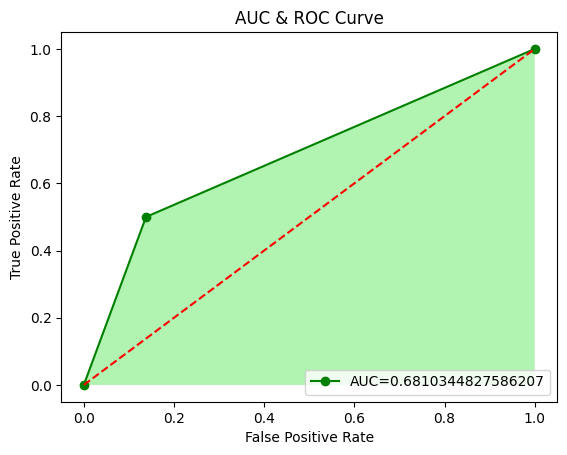

In [126]:
# đồ thị AUC & ROC
fpr, tpr, _ = metrics.roc_curve(y_test, y_test_predicted_065)
auc = metrics.roc_auc_score(y_test, y_test_predicted_065)
plt.plot(fpr,tpr,'go-',label="AUC="+str(auc))
plt.plot([0,1],[0,1],'r--')
plt.title("AUC & ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.fill_between(fpr, tpr, facecolor='lightgreen', alpha=0.7)
plt.show()

In [131]:
# câu 20. Viết chương trình dự báo bệnh tim dưới dạng Console Application, cho phép người dùng 
# nhập các đặc trưng đầu vào (feature input) và ngưỡng xác suất (threshold, nếu không nhập 
# ngưỡng thì mặc định ngưỡng là 0.5). Sau đó, in ra kết quả chẩn đoán bệnh tim.

age	= int(input("Nhap age: "))
sex	= int(input("Nhap sex: "))
cp = int(input("Nhap cp: "))
trestbps = int(input("Nhap trestbps: "))
chol = int(input("Nhap chol: "))
fbs = int(input("Nhap fbs: "))
restecg = int(input("Nhap restecg: "))
thalach	= int(input("Nhap thalach: "))
exang = int(input("Nhap exang: "))
oldpeak	= float(input("Nhap oldpeak: "))
slope = int(input("Nhap slope: "))
ca = int(input("Nhap ca: "))
thal = int(input("Nhap thal: "))

threshold = input("Nhap threshold (mac dinh 0.5): ")

if (threshold.strip() == ''):
    threshold = 0.5
else:
    threshold = float(threshold)

result = (knn.predict_proba(np.array([age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, 
                      ca, thal]).reshape(1, -1))[:,1] >= threshold).astype(float)

print(f'ket qua: {result[0]}')

ket qua: 1.0
